In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

[0.9700000025000002, 0.935555555, 0.9761111125, 0.9161111104999999, 0.930555555, 0.8633333345, 0.9327777780000002, 0.9272222219999999, 0.928333334, 0.8666666664999999, 0.9477777780000001, 0.9566666669999999, 0.9416666645, 0.9661111115000001, 0.9916666665, 0.835, 0.8588888895, 0.8972222215000001, 0.8461111110000001, 0.8566666665, 0.9338888890000001, 0.8516666675000001, 0.881666665, 0.9383333334999999, 0.8222222220000002]
mean_all:  [-0.1275     -0.23972222 -0.05277778 -0.32222222 -0.31888889]
sum_axis0:  [-0.21666666 -0.23111111 -0.14277778 -0.17166666 -0.29888889]
sum_axis1:  [-0.03833333 -0.24833333  0.03722222 -0.47277778 -0.33888889]


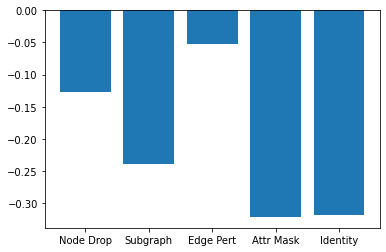

           Node Drop  Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop   0.016667 -0.017778    0.022778  -0.037222 -0.022778
Subgraph   -0.090000 -0.020556   -0.026111  -0.025000 -0.086667
Edge Pert  -0.005556  0.003333   -0.011667   0.012778  0.038333
Attr Mask  -0.118333 -0.094444   -0.056111  -0.107222 -0.096667
Identity   -0.019444 -0.101667   -0.071667  -0.015000 -0.131111


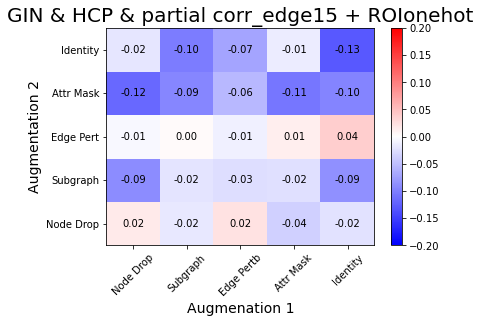

In [63]:
#gin encoder accuracy gain

##no pretrain acc
edge = 'edge15'
encoder = 'gin'
fold = 5
with open(f'../../roi/5-fold/{edge}/{encoder}_0.001_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])
    
# pretrain acc


gcn_mean_arr = []
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/gin_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        gin_mean_arr.append(mean)
print(gin_mean_arr)
gin_mean_arr =  np.array(gin_mean_arr) - np.array(mean_no_pretrain) 
#gin_mean_arr = np.array(mean_no_pretrain) - np.array(gin_mean_arr) 
gin_mean_arr_np = np.reshape(gin_mean_arr,[5,5])

#-----------------------------------------
arr_sum = []
sum_axis0 = gin_mean_arr_np.sum(axis = 0)
sum_axis1 = gin_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print("mean_all: ", mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

#sum_result = 

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)


x = np.arange(5)
augmentations = ['Node Drop','Subgraph','Edge Pert','Attr Mask','Identity']
values = mean_all

plt.bar(x, values)
plt.xticks(x, augmentations)

plt.show()
#plt.savefig(f'./{encoder}_manual_fig_{edge}_joaoGain_sum_with_no_pretrain.png')

#-----------------------------------------

gin_mean_arr = pd.DataFrame(gin_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(gin_mean_arr)

plt.pcolor(gin_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(gin_mean_arr.columns), 1), gin_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(gin_mean_arr.index), 1), gin_mean_arr.index)

plt.title(f'GIN & HCP & partial corr_{(edge)} + ROIonehot', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % gin_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.2, 0.2)
#plt.savefig(f'./gin_manual_fig_{edge}_aug3joaoGain_with_gcl.png', bbox_inches = 'tight')

[0.7366666629999998, 0.6466666665, 0.7438888875, 0.7733333339999999, 0.811111111, 0.4644444435, 0.807777776, 0.5483333325, 0.5316666665, 0.494444444, 0.8633333330000001, 0.8044444439999999, 0.6116666659999999, 0.6266666700000001, 0.7749999999999999, 0.7594444455, 0.630555557, 0.47722222250000007, 0.771111112, 0.752222223, 0.843333329, 0.623888889, 0.7388888889999999, 0.793333334, 0.793333334]
mean_all [-0.34944445 -0.85888889 -0.63833333 -0.59555555 -0.32944444]
sum_axis0:  [-0.37166667 -0.52555555 -0.91888889 -0.54277777 -0.41277777]
sum_axis1:  [-0.32722222 -1.19222222 -0.35777777 -0.64833332 -0.24611111]


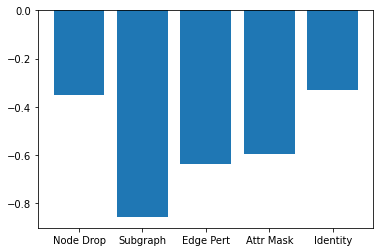

           Node Drop      Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop  -0.071111 -1.611111e-01   -0.063889  -0.034444  0.003333
Subgraph   -0.343333 -9.999999e-10   -0.259444  -0.276111 -0.313333
Edge Pert   0.055556 -3.333333e-03   -0.196111  -0.181111 -0.032778
Attr Mask  -0.048333 -1.772222e-01   -0.330556  -0.036667 -0.055556
Identity    0.035556 -1.838889e-01   -0.068889  -0.014444 -0.014444


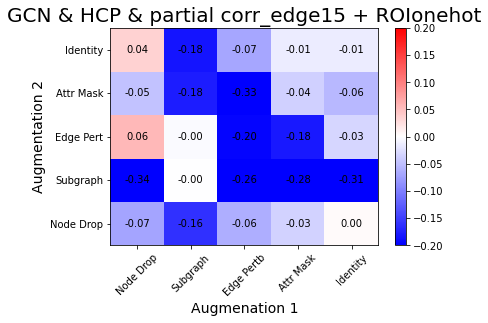

In [66]:
#gcn encoder accuracy gain

##no pretrain acc
edge = 'edge55'
encoder = 'gcn'

with open(f'../../roi/5-fold/{edge}/{encoder}_0.001_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])

##pretrain acc
gcn_mean_arr=[]
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/{encoder}_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        gcn_mean_arr.append(mean)
print(gcn_mean_arr)
gcn_mean_arr = np.array(gcn_mean_arr) - np.array(mean_no_pretrain)
#gcn_mean_arr = np.array(mean_no_pretrain) - np.array(gcn_mean_arr)
gcn_mean_arr_np = np.reshape(gcn_mean_arr,[5,5])


#-----------------------------------------
arr_sum = []
sum_axis0 = gcn_mean_arr_np.sum(axis = 0)
sum_axis1 = gcn_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print("mean_all", mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)

x = np.arange(5)
augmentations = ['Node Drop','Subgraph','Edge Pert','Attr Mask','Identity']
values = mean_all

plt.bar(x, values)
plt.xticks(x, augmentations)

plt.show()

#-----------------------------------------

gcn_mean_arr = pd.DataFrame(gcn_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(gcn_mean_arr)

plt.pcolor(gcn_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(gcn_mean_arr.columns), 1), gcn_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(gcn_mean_arr.index), 1), gcn_mean_arr.index)

plt.title(f'GCN & HCP & partial corr_{(edge)} + ROIonehot', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % gcn_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.2, 0.2)
#plt.savefig(f'./{encoder}_manual_fig_{edge}_aug3joaoGain_with_gcl.png', bbox_inches = 'tight')

[0.7833333335, 0.8600000000000001, 0.857777778, 0.762777778, 0.7488888899999999, 0.8400000009999999, 0.8288888875, 0.9283333345000001, 0.813888889, 0.8594444435, 0.9027777785000001, 0.530000001, 0.8094444455, 0.8894444445, 0.821111113, 0.7511111109999999, 0.8116666655, 0.821111111, 0.782222223, 0.7927777785000001, 0.8222222225, 0.897777778, 0.7883333335, 0.8766666670000001, 0.761666666]
mean_all [-0.63555556 -0.59222223 -0.61277778 -0.64972223 -0.62638889]
sum_axis0:  [-0.59222223 -0.76333334 -0.48666667 -0.56666667 -0.70777778]
sum_axis1:  [-0.67888889 -0.42111112 -0.73888889 -0.73277778 -0.54500001]


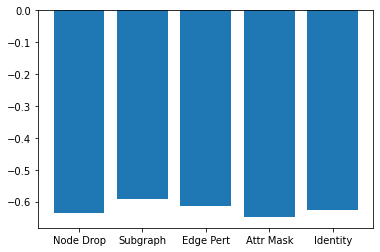

           Node Drop  Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop  -0.155000 -0.078333   -0.080556  -0.175556 -0.189444
Subgraph   -0.098333 -0.109444   -0.010000  -0.124444 -0.078889
Edge Pert  -0.035556 -0.408333   -0.128889  -0.048889 -0.117222
Attr Mask  -0.187222 -0.126667   -0.117222  -0.156111 -0.145556
Identity   -0.116111 -0.040556   -0.150000  -0.061667 -0.176667


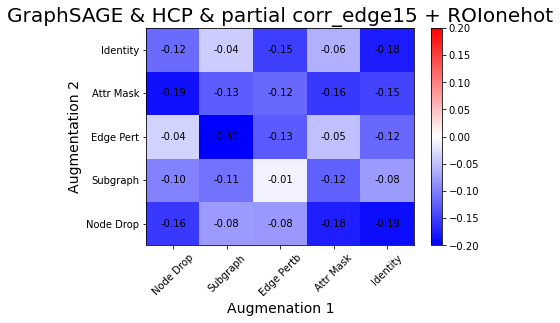

In [69]:
#graphsage encoder accuracy gain

##no pretrain acc
edge = 'edge15'
encoder = 'graphsage'
fold = 5
with open(f'../../roi/5-fold/{edge}/{encoder}_0.01_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])
    
##pretrain acc

gcn_mean_arr = []
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/graphsage_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        graphsage_mean_arr.append(mean)
print(graphsage_mean_arr)
graphsage_mean_arr = np.array(graphsage_mean_arr) - np.array(mean_no_pretrain)
#graphsage_mean_arr = np.array(mean_no_pretrain) - np.array(graphsage_mean_arr) 
graphsage_mean_arr_np = np.reshape(graphsage_mean_arr,[5,5])

#-----------------------------------------
arr_sum = []
sum_axis0 = graphsage_mean_arr_np.sum(axis = 0)
sum_axis1 = graphsage_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print('mean_all', mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)

x = np.arange(5)
augmentations = ['Node Drop','Subgraph','Edge Pert','Attr Mask','Identity']
values = mean_all

plt.bar(x, values)
plt.xticks(x, augmentations)

plt.show()

#-----------------------------------------

graphsage_mean_arr = pd.DataFrame(graphsage_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(graphsage_mean_arr)

plt.pcolor(graphsage_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(graphsage_mean_arr.columns), 1), graphsage_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(graphsage_mean_arr.index), 1), graphsage_mean_arr.index)

plt.title(f'GraphSAGE & HCP & partial corr_{(edge)} + ROIonehot', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % graphsage_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.2, 0.2)
#plt.savefig(f'./{encoder}_manual_fig_{edge}_aug3joaoGain_with_gcl.png', bbox_inches = 'tight')

In [7]:
import numpy as np
mean_arr = []
sd_arr = []
res_file_list_np = []
res_file= open('./ABDIE1_ASD_con_5fold/edge5/file_list', 'r')
res_file_list = [i for i in res_file.read().split()]
for i in range(0,90,10):
    res_file_list_np.append(res_file_list[i])
res_file_list_np  = np.array(res_file_list_np)
res_file_list_np = np.reshape(res_file_list_np, (9,)) 
print(res_file_list_np.shape)

(9,)


In [32]:
#최종 result file 만들기

import numpy as np
auc_mean_arr = []
auc_sd_arr = []
acc_arr =[]
res_file_list_np = []
res_file= open('./ABDIE1_ASD_con_5fold/edge20/graphsage_file', 'r')
res_file_list = [i for i in res_file.read().split()]
for i in range(0,160,10):
    res_file_list_np.append(res_file_list[i])
res_file_list_np  = np.array(res_file_list_np)
res_file_list_np = np.reshape(res_file_list_np, (16,)) 
print(res_file_list_np.shape)

for i in range(len(res_file_list)):
    with open(f'./ABDIE1_ASD_con_5fold/edge20/{res_file_list[i]}', 'r') as file:
        print(i)
        x = file.readlines()
        asd_mean = float(x[10])
        com_mean = float(x[12])
        asd_sd = float(x[11])
        com_sd = float(x[13])
        mean = np.mean([asd_mean, com_mean])
        sd = np.mean([asd_sd, com_sd])
        #print(asd, com, mean)
        auc_mean_arr.append(mean)
        auc_sd_arr.append(sd)
        acc_arr.append(float(x[14]))

auc_mean_arr = np.reshape(np.array(auc_mean_arr), (16,10))
auc_mean = auc_mean_arr.mean(axis=1)
#auc_sd_arr = np.reshape(np.array(sd_arr), (8,10))
#auc_sd_arr = sd_arr.mean(axis=1)
auc_sd_arr = np.std(auc_mean_arr,axis=1)
acc_arr = np.reshape(np.array(acc_arr), (16,10))
acc = acc_arr.mean(axis=1)
acc_sd = np.std(acc_arr,axis=1)
print(auc_mean.shape)
print(auc_sd_arr.shape)
total = np.concatenate((res_file_list_np, auc_mean), axis=0)
total = np.concatenate((total, auc_sd_arr), axis=0)
total = np.concatenate((total, acc), axis=0)
total= np.concatenate((total, acc_sd),axis=0)
print(total)

np.savetxt('./ABDIE1_ASD_con_5fold/edge20/edge20_ASD_cn_graphsage_result.csv',total,delimiter=",", fmt="%s")

(16,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
(16,)
(16,)
['graphsage_0.001_lr1e-4_evaltrain1_split311_epoch300_batch800_s_decay0_layer1_10fold_dim128_fc100_fold10.res'
 'graphsage_0.001_lr1e-4_evaltrain1_split311_epoch300_batch800_s_decay0_layer2_10fold_dim128_fc100_fold10.res'
 'graphsage_0.001_lr1e-4_evaltrain1_split311_epoch300_batch800_s_decay0_layer3_10fold_dim128_fc100_fold10.res'
 'graphsage_0.001_lr1e-4_evaltrain1_split311_epoch300_batch800_s_decay0_layer4_10fold_dim128_fc100_fold10.res'
 'graphs

In [ ]:
plt.plot(['5','10','15'], [0.894, 0.883, 0.923], label='Ours(aug5)')  #aug5
plt.plot(['5','10','15'], [0.941, 0.952, 0.953], label='Ours(aug3)')  #aug3
plt.plot(['5','10','15'], [0.887, 0.926, 0.947], label='Ours(aug2)')  #aug2
plt.plot(['5','10','15'], [0.747, 0.784, 0.809], label='GCN')  #GCN
plt.plot(['5','10','15'], [0.764, 0.785, 0.775], label='GraphSAGE')  #graphsage
plt.plot(['5','10','15'], [0.727, 0.825, 0.807], label='GIN')  #gin
plt.ylim([0.6, 1])
plt.xlabel('Edge sparsity'), plt.ylabel('performance')
plt.title("Performance according to edge sparsity")
plt.legend()
plt.show
plt.savefig('./Performance_according_to_edge_sparsity.png', bbox_inches = 'tight')

<function matplotlib.pyplot.close(fig=None)>

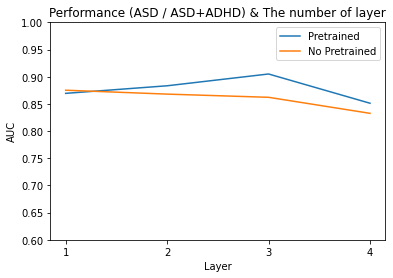

In [25]:
import matplotlib.pyplot as plt

plt.plot(['1','2','3','4'], [0.869396824, 0.883333334, 0.905015874, 0.851206349], label='Pretrained')
plt.plot(['1','2','3','4'], [0.875174602, 0.867999999, 0.862126985, 0.83263492], label='No Pretrained') #aug5
plt.ylim([0.6, 1])
plt.xlabel('Layer'), plt.ylabel('AUC')
plt.title("Performance (ASD / ASD+ADHD) & The number of layer")
plt.legend()
plt.show
plt.savefig('./edge_20_AUC_according_to_num_of_layer.png', bbox_inches = 'tight')
plt.close




<function matplotlib.pyplot.close(fig=None)>

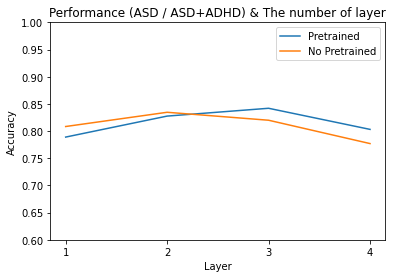

In [27]:
plt.plot(['1','2','3','4'], [0.788961039,0.827575758, 0.841948052, 0.803116883], label='Pretrained')
plt.plot(['1','2','3','4'], [0.808398268, 0.834588745,0.81995671,0.777012987], label='No Pretrained') #aug5
plt.ylim([0.6, 1])
plt.xlabel('Layer'), plt.ylabel('Accuracy')
plt.title("Performance (ASD / ASD+ADHD) & The number of layer")
plt.legend()
plt.show
plt.savefig('./edge_20_Accuracy_according_to_num_of_layer.png', bbox_inches = 'tight')
plt.close

<function matplotlib.pyplot.close(fig=None)>

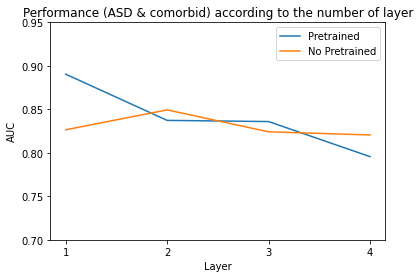

In [46]:
import matplotlib.pyplot as plt

plt.plot(['1','2','3','4'], [0.8904444436, 0.8373015866, 0.8359365082, 0.795619047], label='Pretrained')
plt.plot(['1','2','3','4'], [0.826499277763636, 0.849365078927272, 0.824158729, 0.8205079358], label='No Pretrained') #aug5
plt.ylim([0.7, 0.95])
plt.xlabel('Layer'), plt.ylabel('AUC')
plt.title("Performance (ASD & comorbid) according to the number of layer")
plt.legend()
plt.show
plt.savefig('./AUC(com)_according_to_num_of_layer.png', bbox_inches = 'tight')
plt.close




<function matplotlib.pyplot.close(fig=None)>

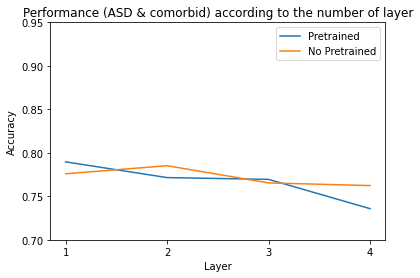

In [48]:
import matplotlib.pyplot as plt

plt.plot(['1','2','3','4'], [0.789610389610389, 0.771515151515151, 0.769480519480519, 0.735800865800865], label='Pretrained')
plt.plot(['1','2','3','4'], [0.775913026367571, 0.785196772924045, 0.765411255411255, 0.762337662337662], label='No Pretrained') #aug5
plt.ylim([0.7, 0.95])
plt.xlabel('Layer'), plt.ylabel('Accuracy')
plt.title("Performance (ASD & comorbid) according to the number of layer")
plt.legend()
plt.show
plt.savefig('./Accuracy(com)_according_to_num_of_layer.png', bbox_inches = 'tight')
plt.close


